                                           Engineering Graduate Salary Analysis
A python machine learning project to analyse and study salary patterns of a engineering graduates having impact on salary by his senior secondary percentage in India.

Aims
•Train a optimized regression model on data.
•Study impact of percentage in senior secondary  only on Salary

Context
The discipline of engineering encompasses a broad range of more specialized fields of engineering, each with a more specific emphasis on particular areas of applied mathematics, applied science, and types of application.
Engineering is a broad discipline that is often broken down into several sub-disciplines. Although an engineer will usually be trained in a specific discipline, he or she may become multi-disciplined through experience. Engineering is often characterized as having four main branches: chemical engineering, civil engineering, electrical engineering, and mechanical engineering. [Reference: Wikipedia]
Engineering Graduates in India
India has a total 6,214 Engineering and Technology Institutions in which around 2.9 million students are enrolled. Every year on an average 1.5 million students get their degree in engineering, but due to lack of skill required to perform technical jobs less than 20 percent get employment in their core domain

Objective
A  question is what determines the salary and the jobs these engineers are offered right after graduation. Various factors such as college grades, candidate skills, the proximity of the college to industrial hubs, the specialization one have, market conditions for specific industries determine this. On the basis of these various factors, our objective is to determine theimpact of percentage of senior secondary on salary of an engineering graduate in India .


Data Description
•	ID: A unique ID to identify a candidate
•	Salary: Annual CTC offered to the candidate (in INR)
•	Gender: Candidate's gender
•	DOB: Date of birth of the candidate
•	10percentage: Overall marks obtained in grade 10 examinations
•	10board: The school board whose curriculum the candidate followed in grade 10
•	12graduation: Year of graduation - senior year high school
•	12percentage: Overall marks obtained in grade 12 examinations
•	12board: The school board whose curriculum the candidate followed
•	CollegeID: Unique ID identifying the university/college which the candidate attended for her/his undergraduate
•	CollegeTier: Each college has been annotated as 1 or 2. The annotations have been computed from the average AMCAT scores obtained by the students in the college/university. Colleges with an average score above a threshold are tagged as 1 and others as 2
•	Degree: Degree obtained/pursued by the candidate
•	Specialization: Specialization pursued by the candidate
•	CollegeGPA: Aggregate GPA at graduation
•	CollegeCityID: A unique ID to identify the city in which the college is located in.
•	CollegeCityTier: The tier of the city in which the college is located in. This is annotated based on the population of the cities.
•	CollegeState: Name of the state in which the college is located
•	GraduationYear: Year of graduation (Bachelor's degree)
•	English: Scores in AMCAT English section
•	Logical: Score in AMCAT Logical ability section
•	Quant: Score in AMCAT's Quantitative ability section
•	Domain: Scores in AMCAT's domain module
•	ComputerProgramming: Score in AMCAT's Computer programming section
•	ElectronicsAndSemicon: Score in AMCAT's Electronics & Semiconductor Engineering section
•	ComputerScience: Score in AMCAT's Computer Science section
•	MechanicalEngg: Score in AMCAT's Mechanical Engineering section
•	ElectricalEngg: Score in AMCAT's Electrical Engineering section
•	TelecomEngg: Score in AMCAT's Telecommunication Engineering section
•	CivilEngg: Score in AMCAT's Civil Engineering section
•	conscientiousness: Scores in one of the sections of AMCAT's personality test
•	agreeableness: Scores in one of the sections of AMCAT's personality test
•	extraversion: Scores in one of the sections of AMCAT's personality test
•	nueroticism: Scores in one of the sections of AMCAT's personality test


In [1]:
from os import getcwd
from pandas import DataFrame, read_csv, get_dummies
from scipy.stats import zscore
from matplotlib.pyplot import figure
from seaborn import set_theme,barplot,countplot,heatmap,violinplot,boxplot
from numpy import abs,median,around


In [2]:
set_theme(context="notebook",style='darkgrid', palette='inferno')

In [4]:
df = read_csv("D:/Wahidnew/Final Project/Engineering_graduate_salary.csv")

In [5]:
df = df.filter(items=["Specialization","Salary"])

In [6]:
df["Salary"] = df["Salary"].replace([df["Salary"][(abs(zscore(df["Salary"])) > 3)]], median(df["Salary"]))

Text(0.5, 1.0, 'Count Plot of Specialization')

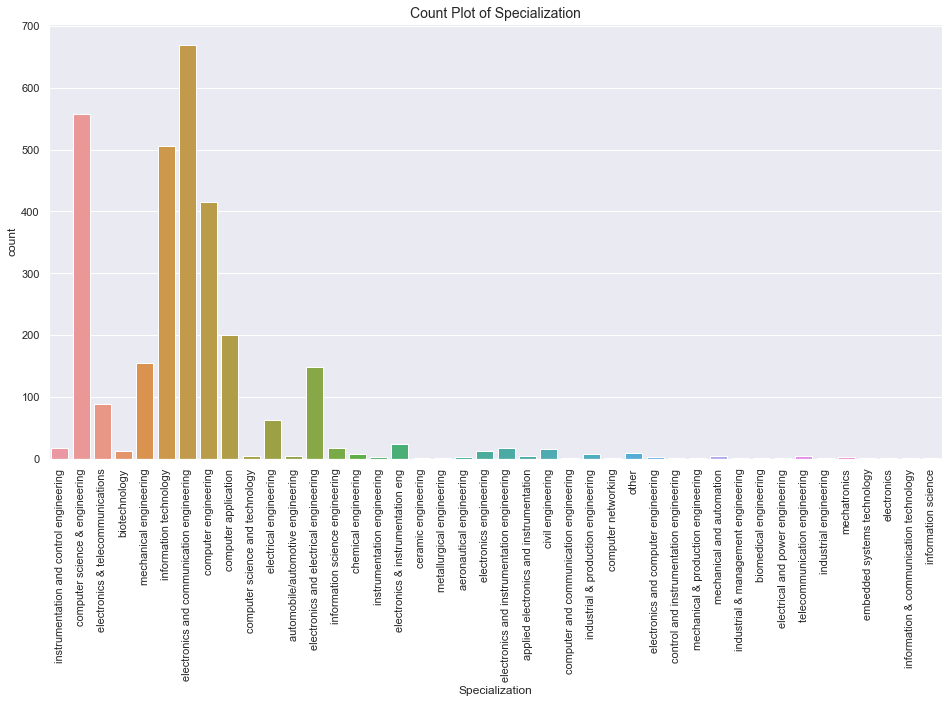

In [7]:
figure(figsize=(16,8))
plot = countplot(x=df["Specialization"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Count Plot of Specialization", fontsize=14)

In [8]:
specializations = df["Specialization"].value_counts()
specializations

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electronics and instrum

In [9]:
rare_specializations = specializations[specializations <= 10]
rare_specializations

other                                      10
industrial & production engineering         8
chemical engineering                        7
applied electronics and instrumentation     5
mechanical and automation                   5
telecommunication engineering               4
automobile/automotive engineering           4
computer science and technology             4
aeronautical engineering                    3
instrumentation engineering                 3
electronics and computer engineering        3
mechatronics                                3
metallurgical engineering                   2
industrial engineering                      2
biomedical engineering                      2
information & communication technology      1
electronics                                 1
embedded systems technology                 1
industrial & management engineering         1
electrical and power engineering            1
computer and communication engineering      1
mechanical & production engineerin

In [10]:
def remove_rare_specialization(value):
    if value in rare_specializations:
        return 'other'
    else:
        return value
df["Specialization"] = df["Specialization"].apply(remove_rare_specialization)
df["Specialization"].value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
other                                           76
electrical engineering                          63
electronics & instrumentation eng               24
electronics and instrumentation engineering     18
instrumentation and control engineering         18
information science engineering                 18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
Name: Specialization, dtype: int64

Text(0.5, 1.0, 'Count Plot of Specialization')

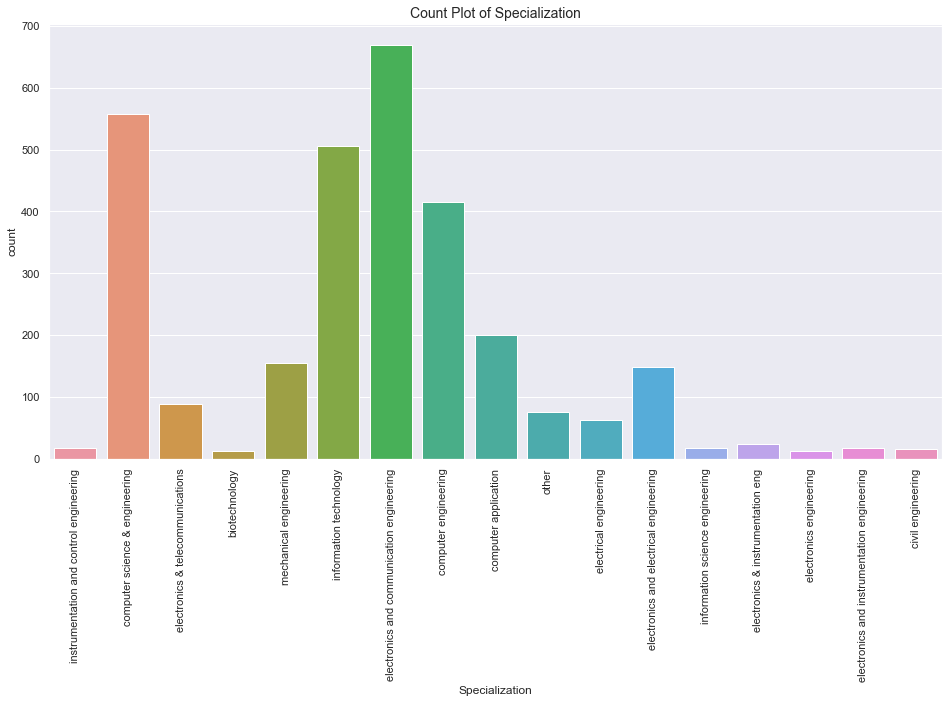

In [11]:
figure(figsize=(16,8))
plot = countplot(x=df["Specialization"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Count Plot of Specialization", fontsize=14)

Text(0.5, 1.0, 'Violin Plot of Specialization with Salary')

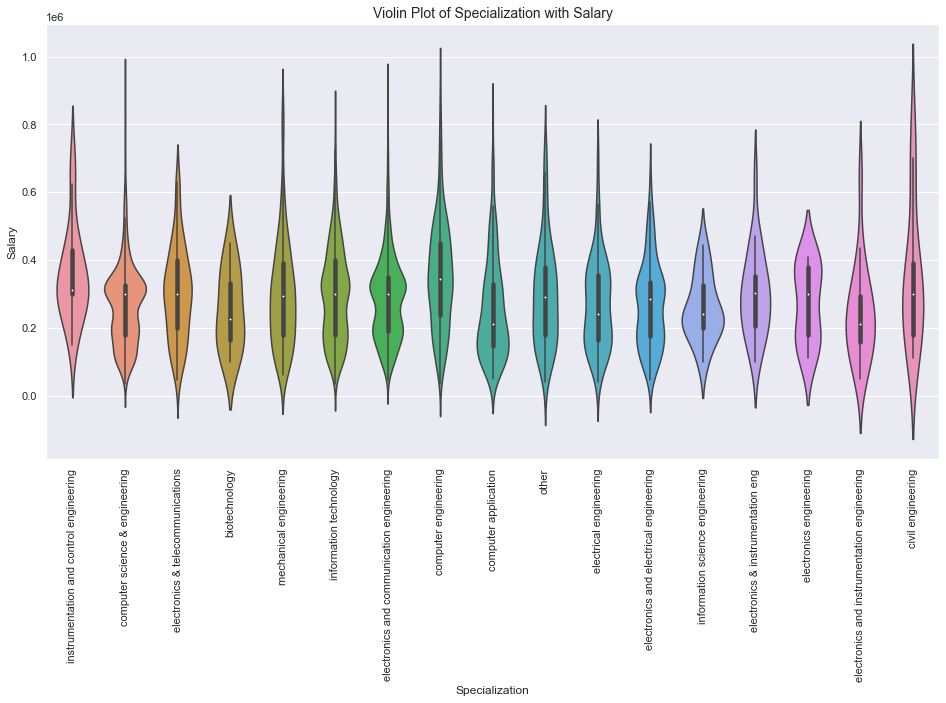

In [12]:
figure(figsize=(16,8))
plot = violinplot(x=df["Specialization"], y=df["Salary"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Violin Plot of Specialization with Salary", fontsize=14)

Text(0.5, 1.0, 'Bar Plot of Specialization with Salary')

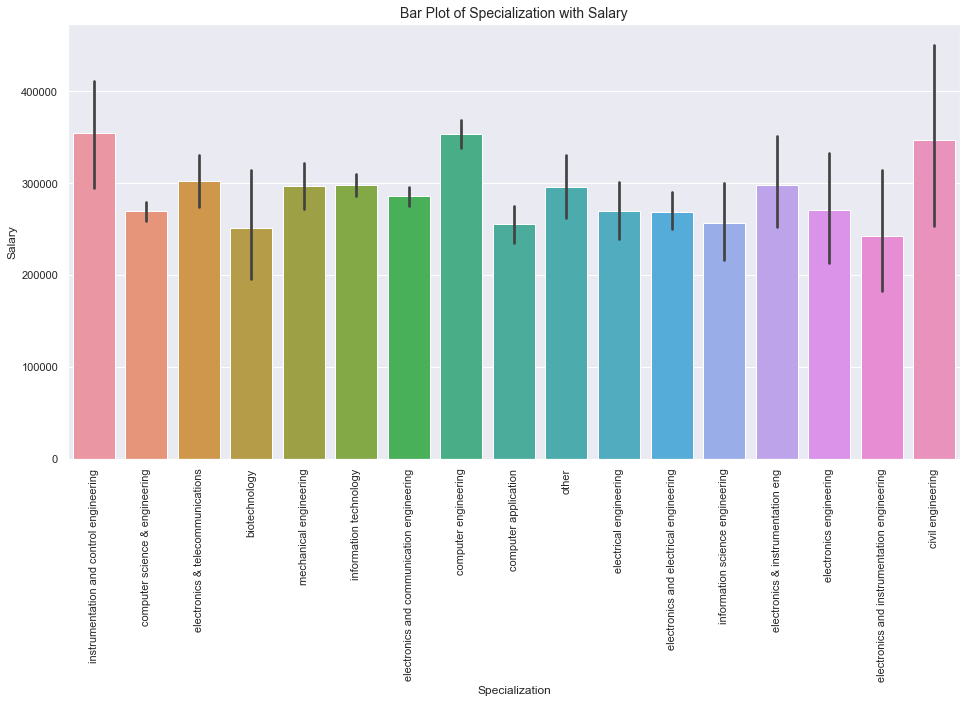

In [13]:
figure(figsize=(16,8))
plot = barplot(x=df["Specialization"], y=df["Salary"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Bar Plot of Specialization with Salary", fontsize=14)

Text(0.5, 1.0, 'Box Plot of Specialization with Salary')

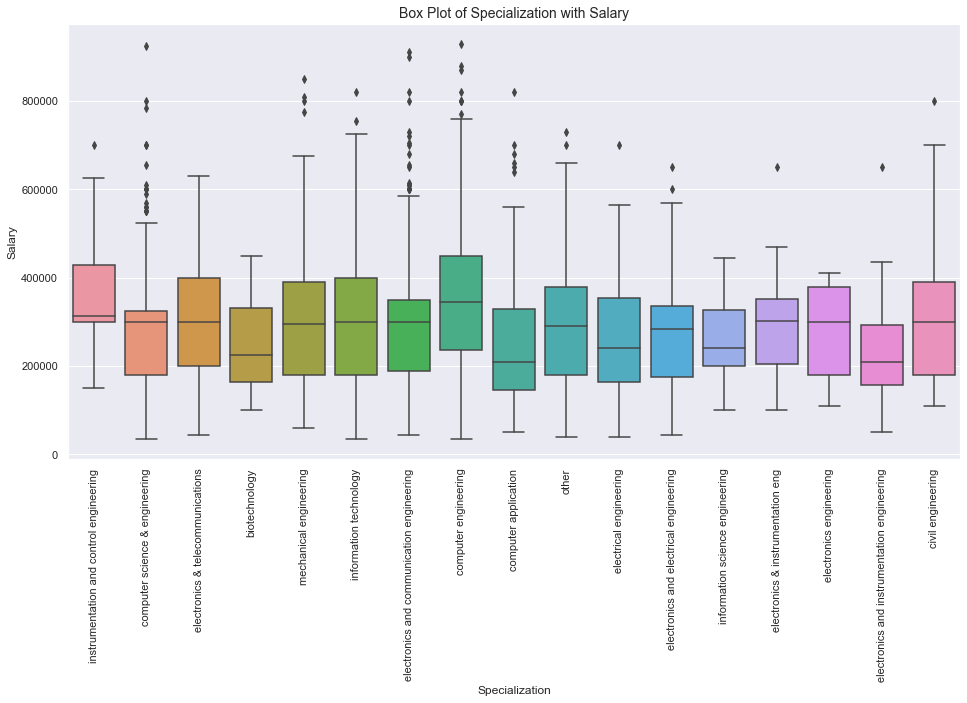

In [14]:
figure(figsize=(16,8))
plot = boxplot(x=df["Specialization"], y=df["Salary"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Box Plot of Specialization with Salary", fontsize=14)

In [15]:
df = get_dummies(df, columns=["Specialization"], prefix="specialization")

Text(0.5, 1.0, 'Correlation Matrix')

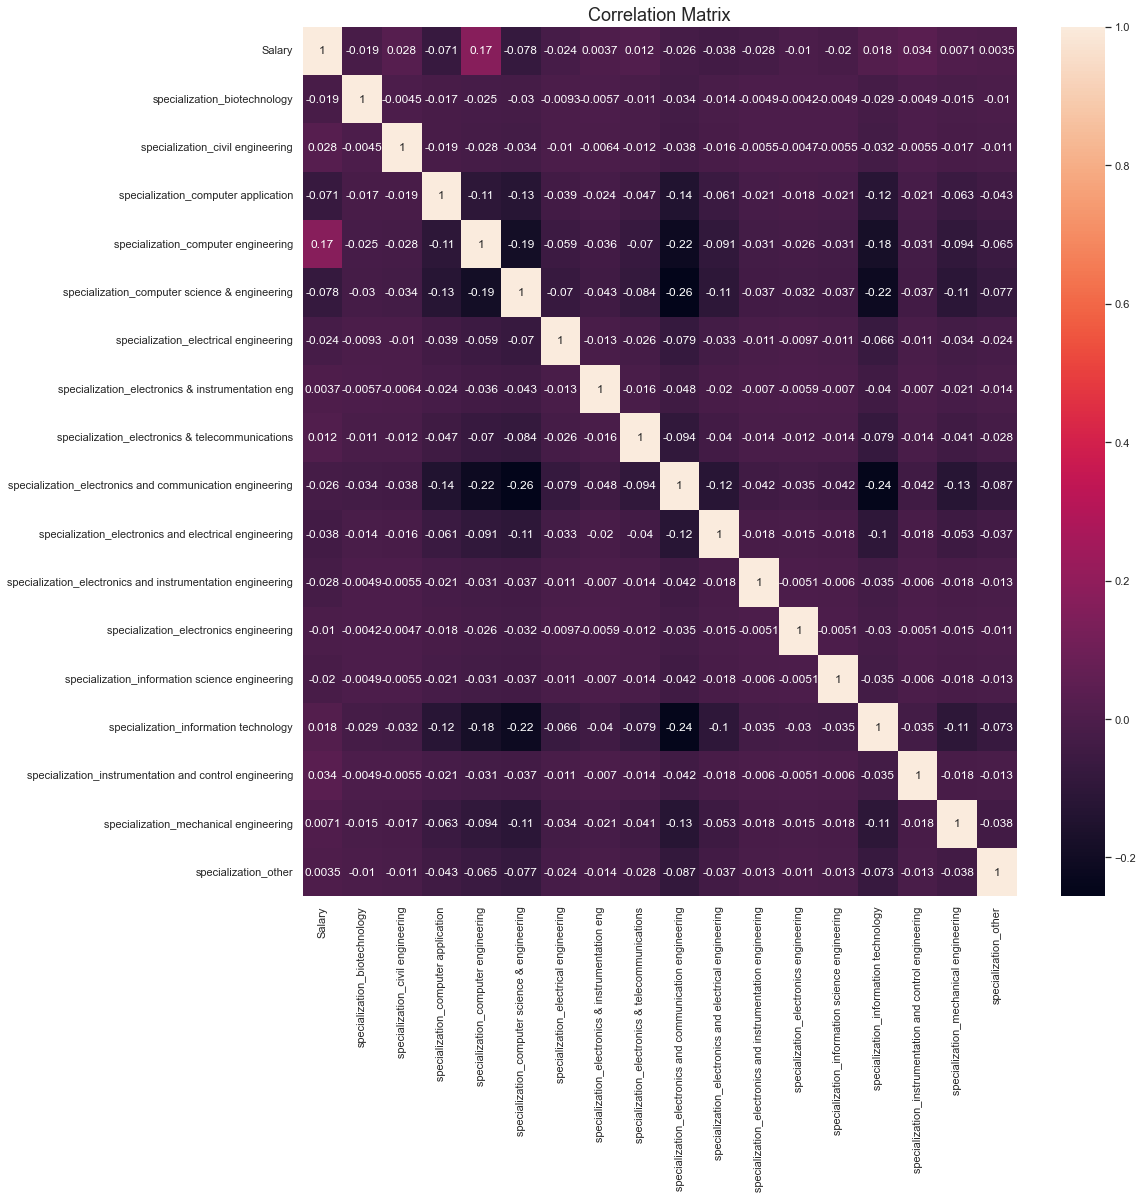

In [16]:
figure(figsize=(16,16))
plot = heatmap(df.corr(), annot=True)
plot.set_title("Correlation Matrix", fontsize=18)

In [17]:
specializations = df.columns.tolist()
specializations.remove('Salary')
specializations

['specialization_biotechnology',
 'specialization_civil engineering',
 'specialization_computer application',
 'specialization_computer engineering',
 'specialization_computer science & engineering',
 'specialization_electrical engineering',
 'specialization_electronics & instrumentation eng',
 'specialization_electronics & telecommunications',
 'specialization_electronics and communication engineering',
 'specialization_electronics and electrical engineering',
 'specialization_electronics and instrumentation engineering',
 'specialization_electronics engineering',
 'specialization_information science engineering',
 'specialization_information technology',
 'specialization_instrumentation and control engineering',
 'specialization_mechanical engineering',
 'specialization_other']

In [18]:
corelations = {}

for specialization in specializations:
    corelations[specialization] = df[specialization].corr(df["Salary"])

frame = DataFrame({
    "Specialization": corelations.keys(),
    "Corr": corelations.values()
})

frame

,Specialization,Corr
0,specialization_biotechnology,-0.018645
1,specialization_civil engineering,0.027860
2,specialization_computer application,-0.070892
3,specialization_computer engineering,0.174789
4,specialization_computer science & engineering,-0.078292
5,specialization_electrical engineering,-0.023864
6,specialization_electronics & instrumentation eng,0.003687
7,specialization_electronics & telecommunications,0.012053
8,specialization_electronics and communication e...,-0.025921
9,specialization_electronics and electrical engi...,-0.037848


In [20]:
dic = {}

for specialization in specializations:
    selected = df[df[specialization] == 1]
    
    students_in_specialization = selected.shape[0]

    to_3 = 0
    to_6 = 0
    to_inf = 0
    for salary in selected['Salary']:
        if (salary < 300000) :
            to_3 = to_3 + 1
        elif (salary >= 300000  and salary < 600000):
            to_6 = to_6 + 1
        else:
            to_inf = to_inf + 1
    
    dic[specialization] = {
        "0 to 300000": around(abs(to_3 / students_in_specialization), decimals=1),
        "300000 to 600000": around(abs(to_6 / students_in_specialization), decimals=1),
        "600000 or more": around(abs(to_inf / students_in_specialization), decimals=1)
        }

package_frame = DataFrame(dic)

package_frame

,specialization_biotechnology,specialization_civil engineering,specialization_computer application,specialization_computer engineering,specialization_computer science & engineering,specialization_electrical engineering,specialization_electronics & instrumentation eng,specialization_electronics & telecommunications,specialization_electronics and communication engineering,specialization_electronics and electrical engineering,specialization_electronics and instrumentation engineering,specialization_electronics engineering,specialization_information science engineering,specialization_information technology,specialization_instrumentation and control engineering,specialization_mechanical engineering,specialization_other
0 to 300000,0.6,0.5,0.6,0.3,0.5,0.5,0.5,0.4,0.5,0.5,0.7,0.5,0.7,0.5,0.2,0.5,0.5
300000 to 600000,0.4,0.3,0.4,0.6,0.5,0.4,0.5,0.5,0.5,0.5,0.2,0.5,0.3,0.5,0.7,0.4,0.4
600000 or more,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.1,0.1,0.1


# From above data and analysis we can deduce 

### ***6 out of 10*** Computer Engineering students have recieved packages between ***3 - 6 lakh***

### Computer Engineering students averagely recieved highest packages
- 1 out of 10 students recieved packages above ***6 lakh***
- 6 out of 10 students recieved packages between ***3 - 6 lakh***
- 3 out of 10 students recieved packages upto ***3 lakh***